# Lecture Two Notes
****

<center><img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-color.svg" height="100" /></center>

***

<center><i>Student name: <a href="//github.com/ZhouZhuofei">ZhouZhuoFei</a></i></center>

****

$A = LU$

$A = QR$

$S = Q \Lambda Q^T$

$A = u\Sigma v^T$

***

$A=QR$,$Q$ -> Gram-Schmidt, Orthonormal.

$S = Q\Lambda Q^T$, S is Symmetric.

$$
S = 
\begin{bmatrix}
q_1 & \cdots & q_n \\
\end{bmatrix}
\begin{bmatrix}
\lambda_1 &  & \\
 &\ddots & \\
 & & \lambda_2
\end{bmatrix}
\begin{bmatrix}
q_{1}^T \\
\vdots \\
q_{n}^T
\end{bmatrix}
$$

$q_1, \cdots q_n$ is eigenvectors, $\lambda_1, \cdots \lambda_n$ is eigenvalue.


$Q\Lambda Q^T$ = sum of rank 1 = $\lambda_1 q_1 q_1^T + \lambda_2 q_2 q_2^T+\cdots+\lambda_n q_n q_n^T$

Look at $Sq_1=\lambda_1 q_1 q_1^T q_1 + \lambda_2 q_2 q_2^Tq_1+\cdots+\lambda_n q_n q_n^T q_1$

$q_1$ with $q_2, q_3,...,q_n$ are orthonormal,$q_2^Tq_1=0, q_3^Tq_1=0,...$

because $q_1^Tq_1=1$, So $Sq_1 = \lambda_1 q_1$

$A = u \Sigma v^T$ : SVD, u(Orthonormal)$\times$$\Sigma$(diag)$\times$Orth

_Do a elimination_:

$$
A = 
\begin{bmatrix}
2 & 3 \\
4 & 7
\end{bmatrix}
$$

$$
A = 
\begin{bmatrix}
2 & 3 \\
4 & 7
\end{bmatrix} = 
\begin{bmatrix}
2 & 3\\
4 & 6
\end{bmatrix} + 
\begin{bmatrix}
0 & 0\\
0 & 1
\end{bmatrix}
$$

$$
A = 
\begin{bmatrix}
 & & & \\
 & & & \\
 & & &
\end{bmatrix} = 
col1 \times row1 + 
\begin{bmatrix}
0 & \cdots \\
\vdots & A_2
\end{bmatrix}
$$

Then $A_2$ also can do this iteration.

_**Fundamental of Linear Algebra**_

four sub space(matrix $A$ is $m\times n, Rank=r$)

- $C(A)$, column space, dim(dimension)=r
- $C(A^T)$, row space, dim=r
- $N(A)$, null space, all solutions to $Ax=0$
- $N(A^T)$, null space, all solutions to $A^T x=0$

$C(A^T) \perp N(A), C(A) \perp N(A^T)$

$\because$ $Ax=0$ so any $rows\times x = 0$ => $rows \perp x$. so get this.

In [31]:
using LinearAlgebra
using PlotlyJS, DataFrames, RDatasets, Colors, Distributions
A = [2 3; 4 7]

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8191464496668304997\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10049284597541828811\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8191464496668304997\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

2×2 Array{Int64,2}:
 2  3
 4  7

In [6]:
F = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
2×2 Array{Float64,2}:
 1.0  0.0
 0.5  1.0
U factor:
2×2 Array{Float64,2}:
 4.0   7.0
 0.0  -0.5

In [7]:
F.L * F.U

2×2 Array{Float64,2}:
 4.0  7.0
 2.0  3.0

In [8]:
qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
2×2 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.447214  -0.894427
 -0.894427   0.447214
R factor:
2×2 Array{Float64,2}:
 -4.47214  -7.60263
  0.0       0.447214

In [41]:
A = [2 3 5;1 1 7;3 4 12]

3×3 Array{Int64,2}:
 2  3   5
 1  1   7
 3  4  12

In [42]:
N = nullspace(A)

3×1 Array{Float64,2}:
 -0.870285269152674
  0.48953546389837854
  0.05439282932204209

In [68]:
x =N *randn((1,100))

3×100 Array{Float64,2}:
 -0.0205022    1.09349    -0.492091   …   1.43281    -0.91824   0.632229
  0.0115325   -0.615086    0.276801      -0.805956    0.51651  -0.355629
  0.00128139  -0.0683429   0.0307557     -0.0895507   0.05739  -0.0395143

In [44]:
function rand_point_3d(rw)
    trace = scatter3d(;x=rw[1,:],y=rw[2,:], z=rw[3,:], mode="markers",
                        marker=attr(color="#1f77b4", size=1, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="#1f77b4", width=1))
    cluster = mesh3d(;opacity=0.3, x=rw[1,:], y=rw[2,:], z=rw[3,:])
    layout = Layout(autosize=false, width=950, height=600,
                    margin=attr(l=0, r=0, b=0, t=65))
    plot([trace, cluster], layout)
end;

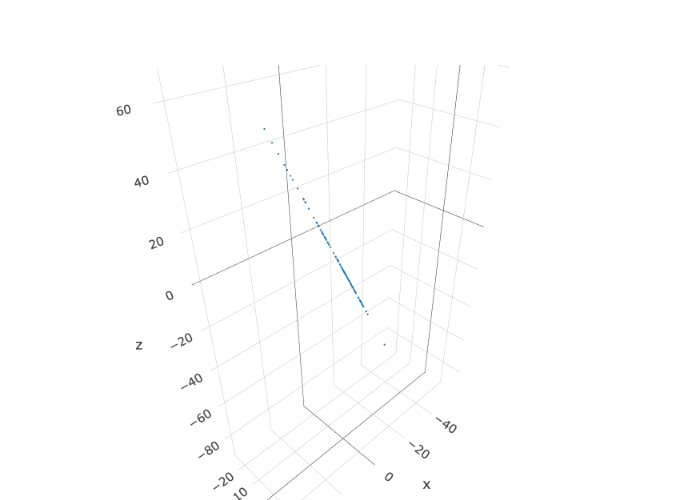

In [63]:
rand_point_3d(x)

In [73]:
CAT = [2 3 5; 1 1 7]'*randn(2,100)

3×100 Array{Float64,2}:
 -0.289824   4.13354   0.142424   2.42087  …  1.0976    2.35662   0.315904
 -0.113354   5.63266  -0.139157   2.71849     1.27519   3.0615    0.676441
 -3.61699   15.4427    3.53119   14.2674      6.08481  10.1524   -1.0335

In [79]:
function rand_point_3d1(rw, rw2)
    trace = scatter3d(;x=rw[1,:],y=rw[2,:], z=rw[3,:], mode="markers",name="line",
                        marker=attr(color="#1f77b4", size=1, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="#1f77b4", width=1))
    trace2 = scatter3d(;x=rw2[1,:], y=rw2[2,:], z=rw2[3,:], mode="markers", name="plane",
                        marker=attr(color="#f7db0d", size=1, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="#f7db0d", width=1))
    cluster2 = mesh3d(;opacity=0.3, x=rw2[1,:], y=rw2[2,:], z=rw2[3,:])
    layout = Layout(autosize=false, width=950, height=600,
                    margin=attr(l=0, r=0, b=0, t=65))
    plot([trace,trace2,cluster2], layout)
end;

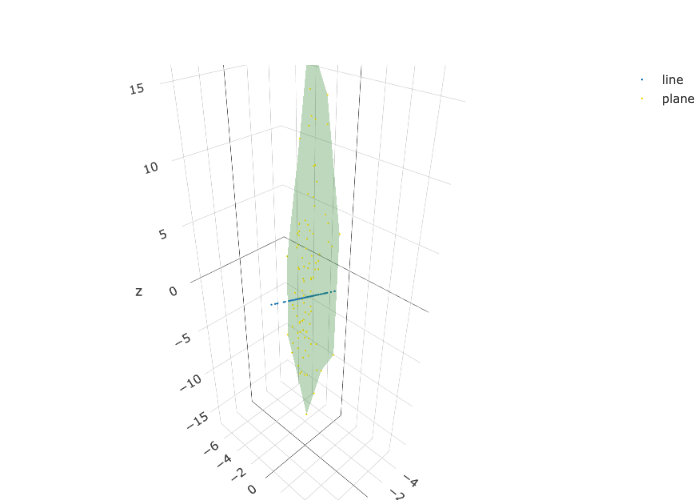

In [80]:
rand_point_3d1(x, CAT)